# Exponential Regrassion

We need to fit an exponential curve to the data for the years 1790 through 1900 and submit a graph of actual population and the predicted population. Let's first input the data

In [12]:
import numpy as np

# Data from year 1790 through 1900
x1 = np.array([
    0,10,20,30,40,50,
    60,70,80,90,100,110
])
y1 = np.array([
    3.929,5.308,7.240,9.638,12.866,17.069,
    23.192,31.443,38.558,50.156,62.948,76.094
])

We want to use an exponential function $y=ae^{bx}$ to fit the curve. Notice it is necessarily true that

$$\ln y = \ln a + b x$$

which means $\ln y$ and $x$ have a linear relationship. We could use the method of least square to calculate $b$ and $\ln a$.

In [13]:
# np.polyfit(x, y, deg) returns a vector of coefficients
# that minimises the squared error.

%config InlineBackend.figure_format = 'svg'
import math
import matplotlib.pyplot as plt

b, lna = np.polyfit(x1, np.log(y1), 1)
a = math.exp(lna)

print("a = ", a, "b =", b)

a =  4.204283604036693 b = 0.0273865212169


This indicates that the exponential function is 

$$ y = 4.2 e^{0.0274x}$$

Now we can plot the predicted value and actual population.

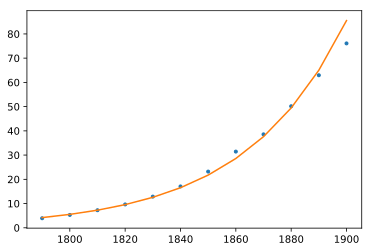

In [14]:
predicted_y1 = a * np.exp(b * x1)

plt.plot(x1 + 1790, y1, '.')
plt.plot(x1 + 1790, predicted_y1, '-')

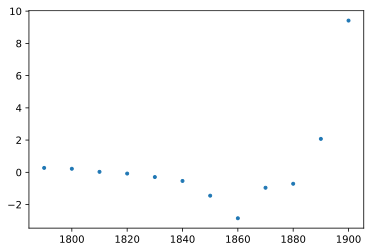

In [15]:
# Residual plot
plt.plot(x1 + 1790, predicted_y1 - y1, '.')

# Logistic Regression

We need to fit a logistic curve to the data for the years 1790 through 2010 and submit a graph of actual population and the predicted population. Let's first input the data

In [16]:
x2 = np.array([
    0,10,20,30,40,50,
    60,70,80,90,100,110,
    120,130,140,150,160,170,
    180,190,200,210,220
])
y2 = np.array([
    3.929,5.308,7.240,9.638,12.866,17.069,
    23.192,31.443,38.558,50.156,62.948,76.094,
    92.407,106.461,123.077,132.122,152.271,180.671,
    205.052,227.225,249.464,282.125,308.745
])

We want to use a logistic function

$$ y = \frac{L}{1 + e^{a+bx}}$$

to model the data. Notice that, as the book points out, it is necessarily true that

$$\ln \Big(\frac{L-y}{y}\Big) = a + bx$$

which means, $\ln \Big(\frac{L-y}{y}\Big)$ is linear with $x$. In this problem, we assume the limit $L$ is 340. Now we can find the values of $a$ and $b$ by similar process.

In [17]:
L = 340
b, a = np.polyfit(x2, np.log((L - y2) / y2), 1)

print("a =", a, "b =", b)

a = 4.35677585774 b = -0.0275780504044


This indicates that the logistic function is

$$ y = \frac{340}{1 + e^{4.357+-0.0276x}}$$

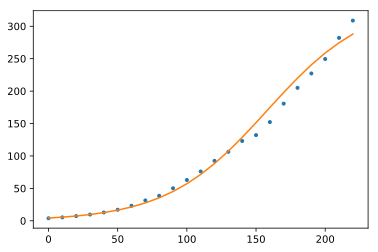

In [18]:
predicted_y2 = L / (1 + np.exp(a + b * x2))

plt.plot(x2, y2, '.')
plt.plot(x2, predicted_y2, '-')

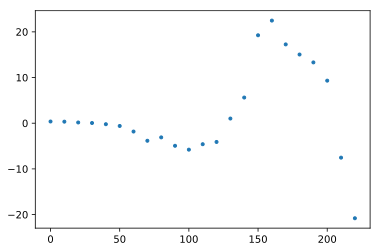

In [19]:
# Residual plot
plt.plot(x2, predicted_y2 - y2, '.')